<a href="https://colab.research.google.com/github/Claptar/play_around_find_out/blob/main/statistics/expectation_maximisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Теоретическое введение
Посмотрим на Expectation Maximisation алгоритм на примере задачи кластеризации, где мы хотели бы разделить два гаусовских распределения. Пусть у нас есть случайная выборка из $X_i$ которая с некоторой вероятностью пришла из одного из двух гаусовских распределений. Функция плотности вероятности будет выглядеть следующим образом:

$$
f(x_i|\mu_1, \mu_2, \sigma^2, p) = \frac{p}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x_i-\mu_1)^2}{2\sigma^2}} + \frac{1-p}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x_i-\mu_2)^2}{2\sigma^2}}
$$

Здесь может захотеться воспользоваться оценкой параметров используя метод максимального правдоподобия. Это можно было бы сделать только есть одна проблема: знак суммы в формуле плотности вероятности, который очень сильно усложняет поиск производных.

Тогда сделаем следующим образом. Введем случайную величину $Y$ напрямую ассоциированую с одной из двух гауссиан. $Y=1$ принимает значение если наблюдение пришло из первой гауссианы, и $Y=0$ если из второй. Тогда совместная функция распределения принимает следующий вид:

$$
f(x_i,y_i|\theta) = \frac{p^y(1-p)^{1-y}}{\sqrt{2\pi\sigma^2}}e^{-\frac{y}{2}\frac{(x_i-\mu_1)^2}{\sigma^2}-\frac{1-y}{2}\frac{(x_i-\mu_2)^2}{\sigma^2}}
$$

Если бы нам были известны значения $y_i$ мы бы могли воспользоваться методом максимального правдоподобия и найти параметры распределения (фактически у нас было бы два нормальных распределения и мы могли бы найти параметры каждого по отдельности, хотя в данном случае оценка дисперсии могла бы использовать информацию об наблюдениях из двух распределений). Оценка максимального правдоподобия находилась бы следующим образом:

$$
\hat{\theta}_{MLE}=\mathop{\arg\max}_{\theta}\log f(\overline{x}, \overline{y}|\theta),
$$

где $f(\overline{x}, \overline{y}|\theta)$ функция правдоподобия, которая выражается как:

$$
f(\overline{x}, \overline{y}|\theta) = \prod_{i=1}^nf(x_i, y_i|\theta)
$$

В нашем случае мы не знаем значения $y_i$ (т.е. $Y_i$ является латентной переменной) и как раз хотели бы уметь её оценивать. Из-за того что мы не знаем $y_i$ мы не можем воспользоваться методом максимального правдоподобия. Здесь нам на помощь и приходит **EM** алгоритм.

В своей сущности **EM** алгоритм предлагает нам иттеративно оценивать неизвестные нам величины в функции правдаподобия взяв среднее по всем возможным значениям (используя параметры распределения найденные на предыдущем шаге иттерации). Математически это выглядит следующим образом:

$$
\hat{\theta}^{(j+1)}_{EM}=\mathop{\arg\max}_{\theta}\mathbb{E}\left[\log f(\overline{x}, \overline{y}|\theta)|\overline{x},\hat{\theta}^{(j)}\right]
$$

Рассмотрим это на нашем примере. Для начала найдем условное матожидание логарифма функции правдоподобия нашей выборки. Условное матожидание логарифма функции правоподобия это сумма условных матожиданий:

$$
\mathbb{E}\left[\log f(\overline{x}, \overline{y}|\theta)|\overline{x},\hat{\theta}^{(j)}\right] = \sum_{i=1}^n\mathbb{E}\left[\log f(x_i, y_i|\theta)|x_i,\hat{\theta}^{(j)}\right]
$$

Тогда найдем условное матожидания логарифма функции правдоподобия для одного наблюдения

$$
\mathbb{E}\left[\log f(x_i, y_i|\theta)|x_i,\hat{\theta}^{(j)}\right] =
\\
= \mathbb{E}\left[y_i\log p + (1-y_i)\log(1-p) - \frac{1}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\left\{y(x_i-\mu_1)^2 + (1-y_i)(x_i-\mu_2)^2\right\}|x_i,\hat{\theta}^{(j)}\right] =
\\
= \mathbb{E}\left[y_i|x_i,\hat{\theta}^{(j)}\right]\log p + (1-\mathbb{E}\left[y_i|x_i,\hat{\theta}^{(j)}\right])\log(1-p) - \frac{1}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\left\{\mathbb{E}\left[y_i|x_i,\hat{\theta}^{(j)}\right](x_i-\mu_1)^2 + (1-\mathbb{E}\left[y_i|x_i,\hat{\theta}^{(j)}\right])(x_i-\mu_2)^2\right\}
$$

Остается найти условное матожидание  $\mathbb{E}\left[y_i|x_i,\hat{\theta}^{(j)}\right]$. Условное распределение $y_i$ в данном случае очевидно является бернулиевским распределением. Тогда матожидание равняется вероятности $\mathbb{P}(Y_i=1|x_i, \hat{\theta}^{(j)})$. Обозначим это выражение за $q_i^{(j)}$. Оно выражается следующим образом:

$$
 \mathbb{E}\left[y_i|x_i,\hat{\theta}^{(j)}\right]= \sum_{y=0}^1y_i*f(y_i|x_i,\hat{\theta}^{(j)}) = 0\cdot f(0|x_i,\hat{\theta}^{(j)}) + 1\cdot f(1|x_i,\hat{\theta}^{(j)}) = f(y_i=1|x_i,\hat{\theta}^{(j)}) = q_i^{(j)}
$$

Чтобы найти выражение для условного распределения $f(y_i|x_i,\hat{\theta}^{(j)})$ воспользуемся формулой Баеса:

$$
f(y_i|x_i,\hat{\theta}^{(j)}) = \frac{f(y_i,x_i|\hat{\theta}^{(j)})}{f(x_i|\hat{\theta}^{(j)})}= \frac{f(y_i,x_i|\hat{\theta}^{(j)})}{f(y_i=0,x_i|\hat{\theta}^{(j)}) + f(y_i=1,x_i|\hat{\theta}^{(j)})},
$$

тогда выражение для $q_i^{(j)}$ принимает вид:

$$
q_i^{(j)} = f(y_i=1|x_i,\hat{\theta}^{(j)}) = \frac{\hat{p}^{(j)}e^{-\frac{(x_i-\mu_1)^2}{2\sigma^2}}}{\hat{p}^{(j)}e^{-\frac{(x_i-\mu_1)^2}{2\sigma^2}} + (1-\hat{p}^{(j)})e^{-\frac{(x_i-\mu_2)^2}{2\sigma^2}}}
$$

Наконец мы можем записать выражение для условного матожидания для всей выборки:

$$
\mathbb{E}\left[\log f(\overline{x}, \overline{y}|\theta)|\overline{x},\hat{\theta}^{(j)}\right] = \sum_{i=1}^nq_i^{(j)}\log p + (n -\sum_{i=1}^nq_i^{(j)})\log(1-p) - \frac{n}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\left[\sum_{i=1}^nq_i^{(j)}(x_i-\mu_1)^2 + \sum_{i=1}^n(1-q_i^{(j)})(x_i-\mu_2)^2\right]
$$

Теперь найдем максимум данного выражения по параметрам распределения. Для этого найдем частные производные:

$$
\frac{\partial \mathbb{E}\left[\log f(\overline{x}, \overline{y}|\theta)|\overline{x},\hat{\theta}^{(j)}\right]}{\partial p} = \frac{\sum_{i=1}^nq_i^{(j)}}{p} - \frac{n - \sum_{i=1}^nq_i^{(j)}}{1 - p} = 0
\\
\frac{\partial \mathbb{E}\left[\log f(\overline{x}, \overline{y}|\theta)|\overline{x},\hat{\theta}^{(j)}\right]}{\partial \mu_1} = \frac{1}{\sigma^2}\sum_{i=1}^nq_i^{(j)}(x_i-\mu_1)^2=0
\\
\frac{\partial \mathbb{E}\left[\log f(\overline{x}, \overline{y}|\theta)|\overline{x},\hat{\theta}^{(j)}\right]}{\partial \mu_2} = \frac{1}{\sigma^2}\sum_{i=1}^n(1-q_i^{(j)})(x_i-\mu_2)^2=0
\\
\frac{\partial \mathbb{E}\left[\log f(\overline{x}, \overline{y}|\theta)|\overline{x},\hat{\theta}^{(j)}\right]}{\partial \sigma^2} = -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4}\left[\sum_{i=1}^nq_i^{(j)}(x_i-\mu_1)^2 + \sum_{i=1}^n(1-q_i^{(j)})(x_i-\mu_2)^2\right] = 0
$$

Тогда оценки для параметров принимают следующий вид:

$$
\hat{p}^{(j+1)} = \frac{\sum_{i=1}^nq_i^{(j)}}{n},
\\
\hat{\mu_1}^{(j+1)} = \frac{\sum_{i=1}^nq_i^{(j)}x_i}{\sum_{i=1}^nq_i^{(j)}},
\\
\hat{\mu_2}^{(j+1)} = \frac{\sum_{i=1}^n(1-q_i^{(j)})x_i}{\sum_{i=1}^n(1-q_i^{(j)})},
\\
\hat{\sigma}^{2(j+1)} = \frac{1}{n}\left[\sum_{i=1}^nq_i^{(j)}(x_i-\mu_1)^2 + \sum_{i=1}^n(1-q_i^{(j)})(x_i-\mu_2)^2\right].
$$

Здесь хочется отметить, что значения для средних по сути есть взешанное среднее, а оценка для дисперсии это взешанная дисперсия.

Подытожим **EM** алгоритм состоит из двух шагов:

**(E шаг)** Оценка неизвестных значений латентных переменных $Y$ при помощи условного среднего используя значения параметров $\hat{\theta}^{(j)}$ найденные на предыдущем шаге

**(M шаг)** Оценка параметров распределения $\hat{\theta}^{(j+1)}$ при помощи максимизации условного матожидания лонарифма правдоподобия

$$
\hat{\theta}^{(j+1)}_{EM}=\mathop{\arg\max}_{\theta}\mathbb{E}\left[\log f(\overline{x}, \overline{y}|\theta)|\overline{x},\hat{\theta}^{(j)}\right]
$$



# Практическое применение

## Импортирование библиотек и вспомогательные функции

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")

In [ ]:
normal_density = lambda x, mu, var: np.exp(-0.5 * (x - mu) ** 2 / var) / np.sqrt(2 * np.pi * var)
mixture_density = lambda x, p, mu1, mu2, var: p * normal_density(x, mu1, var) + (1 - p) * normal_density(x, mu2, var)
mixture_density_2 = lambda x, p, mu1, mu2, var1, var2: p * normal_density(x, mu1, var1) + (1 - p) * normal_density(x, mu2, var2)

## Генерация данных

Сгенерируем два нормальных распределения

In [ ]:
# фиксируем параметры
n = 10000
mu1 = 4
mu2 = 6
p = 0.3
std = 0.5

# генерируем данные
X1 = np.random.default_rng().normal(mu1, std, int(p * n))
X2 = np.random.default_rng().normal(mu2, std, int((1 - p) * n))
X = np.concatenate([X1, X2])

# записываем в датафрейм
data = pd.DataFrame(X, columns=['x'])
data['y'] = 0
data.iloc[:int(n * p), 1] = 1

data.head()

,x,y
0,4.337362,1
1,4.641990,1
2,3.427368,1
3,4.027268,1
4,5.015189,1


Посмотрим на распределение данных

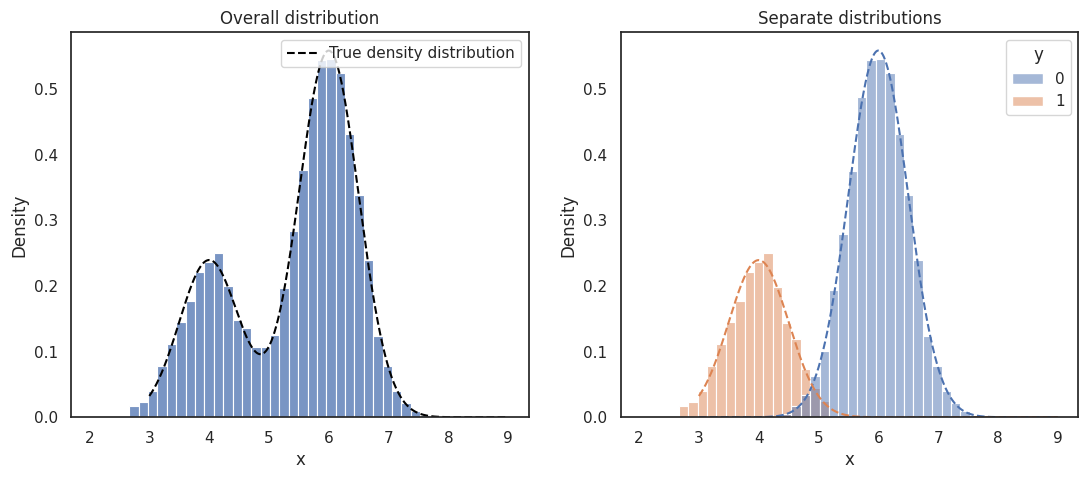

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
t = np.linspace(3, 9, 1000)

sns.histplot(data, x='x', stat='density', ax=ax[0])
ax[0].plot(t, mixture_density(t, p, mu1, mu2, std ** 2), linestyle='--', color='black', label="True density distribution")
ax[0].set_title('Overall distribution')
ax[0].legend()
sns.move_legend(ax[0], "upper right")

sns.histplot(data, x='x', hue='y', multiple='layer', stat='density', ax=ax[1])
ax[1].set_title('Separate distributions')
ax[1].plot(t, normal_density(t, mu2, std ** 2) * (1 - p), linestyle='--')
ax[1].plot(t, normal_density(t, mu1, std ** 2) * p, linestyle='--')

## Реализация алгоритма

In [ ]:
def e_step(x, p, mu1, mu2, var):
    """
    Function that evaluates q^{j+1}_i using parameters from previous step
    """
    prob_1 = p * np.exp(-0.5 * (x - mu1) ** 2 / var)
    prob_0 = (1 - p) * np.exp(-0.5 * (x - mu2) ** 2 / var)
    return prob_1 / (prob_1 + prob_0)


def m_step(x, q):
    """
    Function that evaluates parameters from log likelihood
    """
    p = q.mean()
    mu1 = np.sum(q * x) / q.sum()
    mu2 = np.sum((1 - q) * x) / np.sum(1 - q)
    var = np.mean(q * (x - mu1) ** 2 + (1 - q) * (x - mu2) ** 2)
    return p, mu1, mu2, var


def em_estimate(x, p_init, mu1_init, mu2_init, var_init, n=101, print_step=10):
    """
    EM algorithm
    """
    # first step
    q = e_step(X, p_init, mu1_init, mu2_init, var_init)
    p_i, mu1_i, mu2_i, var_i = m_step(X, q)
    print(f'STEP1: p={p_i:.3f}, mu_1={mu1_i:.3f}, mu_2={mu2_i:.3f}, var={var_i:.3f}, std={np.sqrt(var_i):.3f}, m={q.sum()}')

    # other steps
    for i in range(2, n):
        q = e_step(X, p_i, mu1_i, mu2_i, var_i)
        p_i, mu1_i, mu2_i, var_i = m_step(X, q)
        if not i % print_step:
            print(f'STEP{i}: p={p_i:.3f}, mu_1={mu1_i:.3f}, mu_2={mu2_i:.3f}, var={var_i:.3f}, std={np.sqrt(var_i):.3f}, m={q.sum()}')
    return p_i, mu1_i, mu2_i, var_i

## Применим алгоритм

Найдём начальные значения параметров

In [ ]:
p_initial = 0.5
mu1_initial = np.mean(sorted(X)[:n // 2])
mu2_initial = np.mean(sorted(X)[n // 2:])
var_initial = (np.var(sorted(X)[:n // 2]) + np.var(sorted(X)[n // 2:])) / 2

print(f'p={p_initial:.3f}, mu_1={mu1_initial:.3f}, mu_2={mu2_initial:.3f}, var={var_initial:.3f}, std={np.sqrt(var_initial):.3f}')

p=0.500, mu_1=4.558, mu_2=6.233, var=0.385, std=0.620


Запустим алгоритм

In [ ]:
p_i, mu1_i, mu2_i, var_i = em_estimate(X, p_initial, mu1_initial, mu2_initial, var_initial, n=11, print_step=1)

STEP1: p=0.418, mu_1=4.407, mu_2=6.105, var=0.385, std=0.620, m=4179.871343888166
STEP2: p=0.362, mu_1=4.240, mu_2=6.051, var=0.328, std=0.573, m=3620.592338982088
STEP3: p=0.328, mu_1=4.108, mu_2=6.023, var=0.278, std=0.527, m=3277.409103133526
STEP4: p=0.312, mu_1=4.042, mu_2=6.008, var=0.257, std=0.507, m=3116.126783922254
STEP5: p=0.305, mu_1=4.018, mu_2=6.001, var=0.252, std=0.502, m=3054.0637257711837
STEP6: p=0.303, mu_1=4.010, mu_2=5.998, var=0.251, std=0.501, m=3031.483024030388
STEP7: p=0.302, mu_1=4.007, mu_2=5.997, var=0.251, std=0.501, m=3023.244942768183
STEP8: p=0.302, mu_1=4.006, mu_2=5.997, var=0.251, std=0.501, m=3020.2086981041516
STEP9: p=0.302, mu_1=4.006, mu_2=5.997, var=0.251, std=0.501, m=3019.081689511419
STEP10: p=0.302, mu_1=4.006, mu_2=5.996, var=0.251, std=0.501, m=3018.661692857986


Предскажем метки кластеров

In [ ]:
data['q'] = e_step(X, p_i, mu1_i, mu2_i, var_i)
data['label'] = data['q'].round()
data.head()

,x,y,q,label
0,4.337362,1,0.988178,1.0
1,4.641990,1,0.881818,1.0
2,3.427368,1,0.999991,1.0
3,4.027268,1,0.998978,1.0
4,5.015189,1,0.278839,0.0


Посмотрим на данные

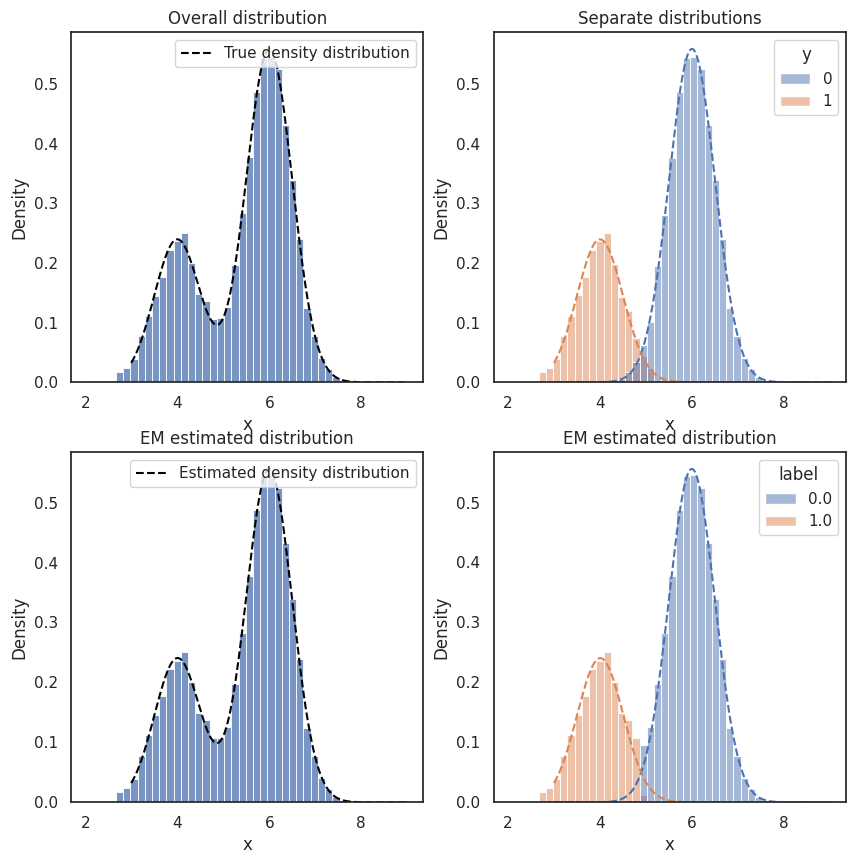

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
t = np.linspace(3, 9, 1000)

sns.histplot(data, x='x', stat='density', ax=ax1)
ax1.plot(t, mixture_density(t, p, mu1, mu2, std ** 2), linestyle='--', color='black', label="True density distribution")
ax1.set_title('Overall distribution')
ax1.legend()
sns.move_legend(ax1, "upper right")

sns.histplot(data, x='x', hue='y', multiple='layer', stat='density', ax=ax2)
ax2.set_title('Separate distributions')
ax2.plot(t, normal_density(t, mu2, std ** 2) * (1 - p), linestyle='--')
ax2.plot(t, normal_density(t, mu1, std ** 2) * p, linestyle='--')

sns.histplot(data, x='x', stat='density', ax=ax3)
ax3.plot(t, mixture_density(t, p_i, mu1_i, mu2_i, var_i), linestyle='--', color='black', label="Estimated density distribution")
ax3.set_title('EM estimated distribution')
ax3.legend()
sns.move_legend(ax3, "upper right")

sns.histplot(data, x='x', hue='label', multiple='layer', stat='density', ax=ax4)
ax4.set_title('EM estimated distribution')
ax4.plot(t, normal_density(t, mu2_i, var_i) * (1 - p_i), linestyle='--')
ax4.plot(t, normal_density(t, mu1_i, var_i) * p_i, linestyle='--')

## Посмотрим на более близкое расположение пиков

In [ ]:
# фиксируем параметры
n = 10000
mu1 = 4
mu2 = 5
p = 0.3
std = 0.5

# генерируем данные
X1 = np.random.default_rng().normal(mu1, std, int(p * n))
X2 = np.random.default_rng().normal(mu2, std, int((1 - p) * n))
X = np.concatenate([X1, X2])

# записываем в датафрейм
data = pd.DataFrame(X, columns=['x'])
data['y'] = 0
data.iloc[:int(n * p), 1] = 1

Найдём начальные значения параметров

In [ ]:
p_initial = 0.5
mu1_initial = np.mean(sorted(X)[:n // 2])
mu2_initial = np.mean(sorted(X)[n // 2:])
var_initial = (np.var(sorted(X)[:n // 2]) + np.var(sorted(X)[n // 2:])) / 2

print(f'p={p_initial:.3f}, mu_1={mu1_initial:.3f}, mu_2={mu2_initial:.3f}, var={var_initial:.3f}, std={np.sqrt(var_initial):.3f}')

p=0.500, mu_1=4.143, mu_2=5.250, var=0.163, std=0.403


Запустим алгоритм

In [ ]:
p_i, mu1_i, mu2_i, var_i = em_estimate(X, p_initial, mu1_initial, mu2_initial, var_initial, n=101, print_step=10)

STEP1: p=0.473, mu_1=4.146, mu_2=5.190, var=0.197, std=0.444, m=4729.038164761865
STEP10: p=0.363, mu_1=4.061, mu_2=5.058, var=0.239, std=0.489, m=3626.634224680214
STEP20: p=0.322, mu_1=4.001, mu_2=5.026, var=0.240, std=0.489, m=3215.8753886365007
STEP30: p=0.308, mu_1=3.982, mu_2=5.014, var=0.241, std=0.491, m=3080.914151002159
STEP40: p=0.303, mu_1=3.976, mu_2=5.010, var=0.243, std=0.492, m=3034.4124165213043
STEP50: p=0.302, mu_1=3.973, mu_2=5.009, var=0.243, std=0.493, m=3017.8023390027447
STEP60: p=0.301, mu_1=3.973, mu_2=5.008, var=0.243, std=0.493, m=3011.7801517240964
STEP70: p=0.301, mu_1=3.972, mu_2=5.008, var=0.243, std=0.493, m=3009.5845672275045
STEP80: p=0.301, mu_1=3.972, mu_2=5.008, var=0.243, std=0.493, m=3008.7824660013
STEP90: p=0.301, mu_1=3.972, mu_2=5.008, var=0.243, std=0.493, m=3008.489220877412
STEP100: p=0.301, mu_1=3.972, mu_2=5.008, var=0.243, std=0.493, m=3008.3819824816114


Предскажем метки кластеров

In [ ]:
data['q'] = e_step(X, p_i, mu1_i, mu2_i, var_i)
data['label'] = data['q'].round()
data.head()

,x,y,q,label
0,5.297919,1,0.013613,0.0
1,3.530689,1,0.962364,1.0
2,4.839380,1,0.088616,0.0
3,4.374964,1,0.412588,0.0
4,3.771804,1,0.901573,1.0


Посмотрим на данные

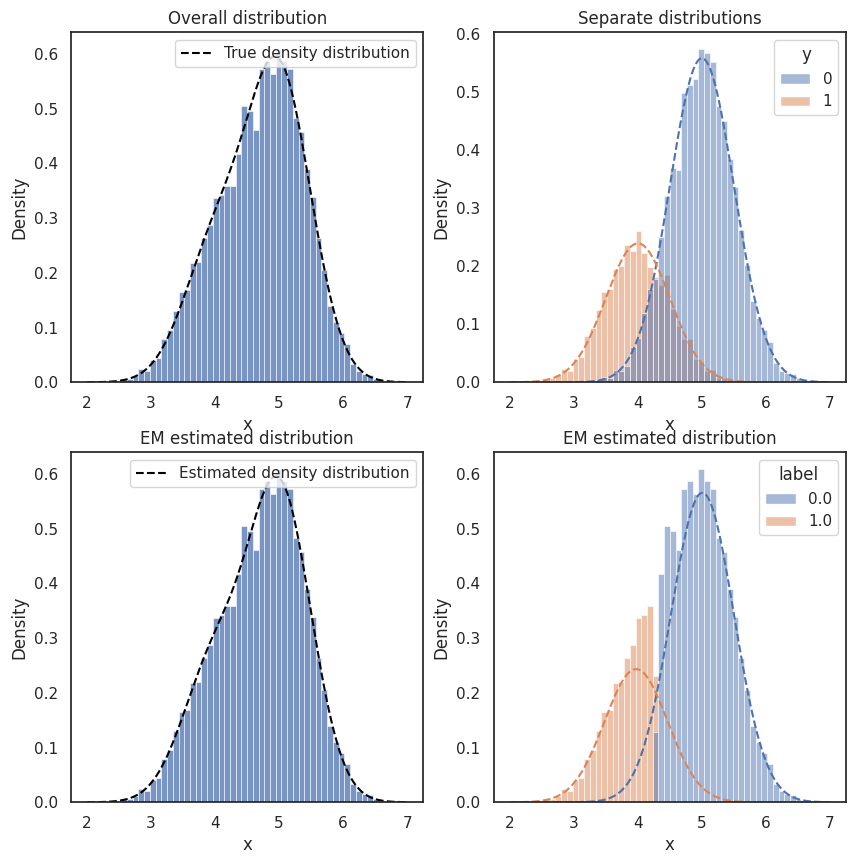

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
t = np.linspace(2, 7, 1000)

sns.histplot(data, x='x', stat='density', ax=ax1, binrange=[2, 7])
ax1.plot(t, mixture_density(t, p, mu1, mu2, std ** 2), linestyle='--', color='black', label="True density distribution")
ax1.set_title('Overall distribution')
ax1.legend()
sns.move_legend(ax1, "upper right")

sns.histplot(data, x='x', hue='y', multiple='layer', stat='density', ax=ax2, binrange=[2, 7])
ax2.set_title('Separate distributions')
ax2.plot(t, normal_density(t, mu2, std ** 2) * (1 - p), linestyle='--')
ax2.plot(t, normal_density(t, mu1, std ** 2) * p, linestyle='--')

sns.histplot(data, x='x', stat='density', ax=ax3, binrange=[2, 7])
ax3.plot(t, mixture_density(t, p_i, mu1_i, mu2_i, var_i), linestyle='--', color='black', label="Estimated density distribution")
ax3.set_title('EM estimated distribution')
ax3.legend()
sns.move_legend(ax3, "upper right")

sns.histplot(data, x='x', hue='label', multiple='layer', stat='density', ax=ax4, binrange=[2, 7])
ax4.set_title('EM estimated distribution')
ax4.plot(t, normal_density(t, mu2_i, var_i) * (1 - p_i), linestyle='--')
ax4.plot(t, normal_density(t, mu1_i, var_i) * p_i, linestyle='--')

# Случай различных дисперсий
## Получение выражений для оценок параметров

В этом случае матожидание логарифма правдоподобия для одного наблюдения записывается как:

$$
\mathbb{E}\left[\log f(x_i, y_i|\theta)|x_i,\hat{\theta}^{(j)}\right] =
\\
= \mathbb{E}\left[y_i\log p + (1-y_i)\log(1-p) - \frac{1}{2}\log(2\pi) - \frac{y_i}{2}\log(\sigma_1^2) - \frac{1-y_i}{2}\log(\sigma_2^2)  - \frac{1}{2\sigma_1^2}y_i(x_i-\mu_1)^2 + - \frac{1}{2\sigma_2^2}(1-y_i)(x_i-\mu_2)^2|x_i,\hat{\theta}^{(j)}\right] =
\\
= q_i^{(j)}\log p + (1-q_i^{(j)})\log(1-p) - \frac{1}{2}\log(2\pi) - \frac{q_i^{(j)}}{2}\log(\sigma_1^2) - \frac{1-q_i^{(j)}}{2}\log(\sigma_2^2)  - \frac{q_i^{(j)}}{2\sigma_1^2}(x_i-\mu_1)^2 + - \frac{1-q_i^{(j)}}{2\sigma_2^2}(x_i-\mu_2)^2
$$

где выражение для $q_i^{(j)}$ принимает вид:

$$
q_i^{(j)} = f(y_i=1|x_i,\hat{\theta}^{(j)}) = \frac{\frac{\hat{p}^{(j)}}{\sigma_1}e^{-\frac{(x_i-\mu_1)^2}{2\sigma_1^2}}}{\frac{\hat{p}^{(j)}}{\sigma_1}e^{-\frac{(x_i-\mu_1)^2}{2\sigma_1^2}} + \frac{1-\hat{p}^{(j)}}{\sigma_2}e^{-\frac{(x_i-\mu_2)^2}{2\sigma_2^2}}}
$$

Наконец мы можем записать выражение для условного матожидания для всей выборки:

$$
\mathbb{E}\left[\log f(\overline{x}, \overline{y}|\theta)|\overline{x},\hat{\theta}^{(j)}\right] = \sum_{i=1}^nq_i^{(j)}\log p + (n -\sum_{i=1}^nq_i^{(j)})\log(1-p) - \frac{n}{2}\log(2\pi) - \sum_{i=1}^n\frac{q_i^{(j)}}{2}\log(\sigma_1^2) - \sum_{i=1}^n\frac{1-q_i^{(j)}}{2}\log(\sigma_2^2) - \sum_{i=1}^n\frac{q_i^{(j)}}{2\sigma_1^2}(x_i-\mu_1)^2 + - \sum_{i=1}^n\frac{1-q_i^{(j)}}{2\sigma_2^2}(x_i-\mu_2)^2
$$

Теперь найдем максимум данного выражения по параметрам распределения. Для этого найдем частные производные:

$$
\frac{\partial \mathbb{E}\left[\log f(\overline{x}, \overline{y}|\theta)|\overline{x},\hat{\theta}^{(j)}\right]}{\partial p} = \frac{\sum_{i=1}^nq_i^{(j)}}{p} - \frac{n - \sum_{i=1}^nq_i^{(j)}}{1 - p} = 0
\\
\frac{\partial \mathbb{E}\left[\log f(\overline{x}, \overline{y}|\theta)|\overline{x},\hat{\theta}^{(j)}\right]}{\partial \mu_1} = \frac{1}{2\sigma_1^2}\sum_{i=1}^nq_i^{(j)}(x_i-\mu_1)^2=0
\\
\frac{\partial \mathbb{E}\left[\log f(\overline{x}, \overline{y}|\theta)|\overline{x},\hat{\theta}^{(j)}\right]}{\partial \mu_2} = \frac{1}{2\sigma_2^2}\sum_{i=1}^n(1-q_i^{(j)})(x_i-\mu_2)^2=0
\\
\frac{\partial \mathbb{E}\left[\log f(\overline{x}, \overline{y}|\theta)|\overline{x},\hat{\theta}^{(j)}\right]}{\partial \sigma_1^2} = -\frac{\sum_{i=1}^nq_i^{(j)}}{2\sigma_1^2} + \frac{\sum_{i=1}^nq_i^{(j)}(x_i-\mu_1)^2}{2\sigma_1^4}  = 0
\\
\frac{\partial \mathbb{E}\left[\log f(\overline{x}, \overline{y}|\theta)|\overline{x},\hat{\theta}^{(j)}\right]}{\partial \sigma_2^2} = -\frac{n - \sum_{i=1}^nq_i^{(j)}}{2\sigma_2^2} + \frac{\sum_{i=1}^n(1-q_i^{(j)})(x_i-\mu_1)^2}{2\sigma_2^4}  = 0
$$

Тогда оценки для параметров принимают следующий вид:

$$
\hat{p}^{(j+1)} = \frac{\sum_{i=1}^nq_i^{(j)}}{n},
\\
\hat{\mu_1}^{(j+1)} = \frac{\sum_{i=1}^nq_i^{(j)}x_i}{\sum_{i=1}^nq_i^{(j)}},
\\
\hat{\mu_2}^{(j+1)} = \frac{\sum_{i=1}^n(1-q_i^{(j)})x_i}{\sum_{i=1}^n(1-q_i^{(j)})},
\\
\hat{\sigma_1}^{2(j+1)} = \frac{\sum_{i=1}^nq_i^{(j)}(x_i-\mu_1)^2}{\sum_{i=1}^nq_i^{(j)}}
\\
\hat{\sigma_2}^{2(j+1)} = \frac{\sum_{i=1}^n(1-q_i^{(j)})(x_i-\mu_2)^2}{n - \sum_{i=1}^nq_i^{(j)}}
$$


## Генерация данных

Сгенерируем два нормальных распределения

In [ ]:
# фиксируем параметры
n = 10000
mu1 = 4
mu2 = 6
p = 0.3
std1 = 0.5
std2 = 0.3

# генерируем данные
X1 = np.random.default_rng().normal(mu1, std1, int(p * n))
X2 = np.random.default_rng().normal(mu2, std2, int((1 - p) * n))
X = np.concatenate([X1, X2])

# записываем в датафрейм
data = pd.DataFrame(X, columns=['x'])
data['y'] = 0
data.iloc[:int(n * p), 1] = 1

data.head()

,x,y
0,3.830891,1
1,3.374447,1
2,4.748367,1
3,3.531273,1
4,3.951979,1


Посмотрим на распределение данных

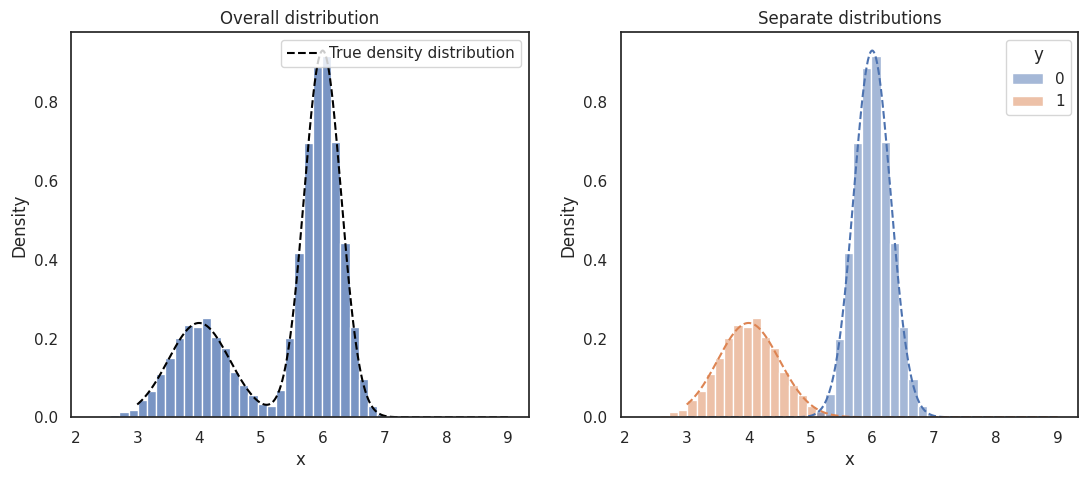

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
t = np.linspace(3, 9, 1000)

sns.histplot(data, x='x', stat='density', ax=ax[0])
ax[0].plot(t, mixture_density_2(t, p, mu1, mu2, std1 ** 2, std2 ** 2), linestyle='--', color='black', label="True density distribution")
ax[0].set_title('Overall distribution')
ax[0].legend()
sns.move_legend(ax[0], "upper right")

sns.histplot(data, x='x', hue='y', multiple='layer', stat='density', ax=ax[1])
ax[1].set_title('Separate distributions')
ax[1].plot(t, normal_density(t, mu2, std2 ** 2) * (1 - p), linestyle='--')
ax[1].plot(t, normal_density(t, mu1, std1 ** 2) * p, linestyle='--')

## Реализация алгоритма

In [ ]:
def e_step(x, p, mu1, mu2, var1, var2):
    """
    Function that evaluates q^{j+1}_i using parameters from previous step
    """
    prob_1 = p * normal_density(x, mu1, var1)
    total_prob = mixture_density_2(x, p, mu1, mu2, var1, var2)
    return prob_1 / total_prob


def m_step(x, q):
    """
    Function that evaluates parameters from log likelihood
    """
    p = q.mean()
    mu1 = np.sum(q * x) / q.sum()
    mu2 = np.sum((1 - q) * x) / np.sum(1 - q)
    var1 = np.sum(q * (x - mu1) ** 2) / q.sum()
    var2 = np.sum((1 - q) * (x - mu2) ** 2) / (1 - q).sum()
    return p, mu1, mu2, var1, var2


def em_estimate(x, p_init, mu1_init, mu2_init, var1_init, var2_init, n=101, print_step=10):
    """
    EM algorithm
    """
    # first step
    q = e_step(X, p_init, mu1_init, mu2_init, var1_init, var2_init)
    p_i, mu1_i, mu2_i, var1_i, var2_i = m_step(X, q)
    print(f'STEP1: p={p_i:.3f}, mu_1={mu1_i:.3f}, mu_2={mu2_i:.3f}, var1={var1_i:.3f}, var2={var2_i:.3f}, std1={np.sqrt(var1_i):.3f}, std2={np.sqrt(var2_i):.3f}')

    # other steps
    for i in range(2, n):
        q = e_step(X, p_i, mu1_i, mu2_i, var1_i, var2_i)
        p_i, mu1_i, mu2_i, var1_i, var2_i = m_step(X, q)
        if not i % print_step:
            print(f'STEP{i}: p={p_i:.3f}, mu_1={mu1_i:.3f}, mu_2={mu2_i:.3f}, var1={var1_i:.3f}, var2={var2_i:.3f}, std1={np.sqrt(var1_i):.3f}, std2={np.sqrt(var2_i):.3f}')
    return p_i, mu1_i, mu2_i, var1_i, var2_i

## Запуск алгоритма

Найдём начальные значения параметров

In [ ]:
p_initial = 0.5
mu1_initial = np.mean(sorted(X)[:n // 2])
mu2_initial = np.mean(sorted(X)[n // 2:])
var1_initial = np.var(sorted(X)[:n // 2])
var2_initial = np.var(sorted(X)[n // 2:])

print(f'p={p_initial:.3f}, mu_1={mu1_initial:.3f}, mu_2={mu2_initial:.3f}, var1={var1_initial:.3f}, var2={var2_initial:.3f}, std1={np.sqrt(var1_initial):.3f}, std2={np.sqrt(var2_initial):.3f}')

p=0.500, mu_1=4.663, mu_2=6.142, var1=0.802, var2=0.047, std1=0.896, std2=0.216


Запустим алгоритм

In [ ]:
p_i, mu1_i, mu2_i, var1_i, var2_i = em_estimate(X, p_initial, mu1_initial, mu2_initial, var1_initial, var2_initial, n=15, print_step=1)

STEP1: p=0.468, mu_1=4.637, mu_2=6.077, var1=0.907, var2=0.057, std1=0.953, std2=0.239
STEP2: p=0.430, mu_1=4.550, mu_2=6.046, var1=0.899, var2=0.064, std1=0.948, std2=0.253
STEP3: p=0.399, mu_1=4.454, mu_2=6.033, var1=0.830, var2=0.069, std1=0.911, std2=0.263
STEP4: p=0.375, mu_1=4.360, mu_2=6.028, var1=0.728, var2=0.073, std1=0.853, std2=0.271
STEP5: p=0.354, mu_1=4.267, mu_2=6.025, var1=0.606, var2=0.077, std1=0.779, std2=0.277
STEP6: p=0.336, mu_1=4.179, mu_2=6.021, var1=0.481, var2=0.080, std1=0.694, std2=0.283
STEP7: p=0.320, mu_1=4.103, mu_2=6.015, var1=0.373, var2=0.082, std1=0.611, std2=0.287
STEP8: p=0.310, mu_1=4.050, mu_2=6.009, var1=0.299, var2=0.085, std1=0.547, std2=0.291
STEP9: p=0.303, mu_1=4.021, mu_2=6.004, var1=0.261, var2=0.087, std1=0.511, std2=0.295
STEP10: p=0.301, mu_1=4.009, mu_2=6.002, var1=0.246, var2=0.088, std1=0.496, std2=0.297
STEP11: p=0.300, mu_1=4.004, mu_2=6.001, var1=0.241, var2=0.089, std1=0.491, std2=0.298
STEP12: p=0.299, mu_1=4.003, mu_2=6.001, 

Предскажем метки кластеров

In [ ]:
data['q'] = e_step(X, p_i, mu1_i, mu2_i, var1_i, var2_i)
data['label'] = data['q'].round()
data.head()

,x,y,q,label
0,3.830891,1,1.000000,1.0
1,3.374447,1,1.000000,1.0
2,4.748367,1,0.998106,1.0
3,3.531273,1,1.000000,1.0
4,3.951979,1,1.000000,1.0


Посмотрим на данные

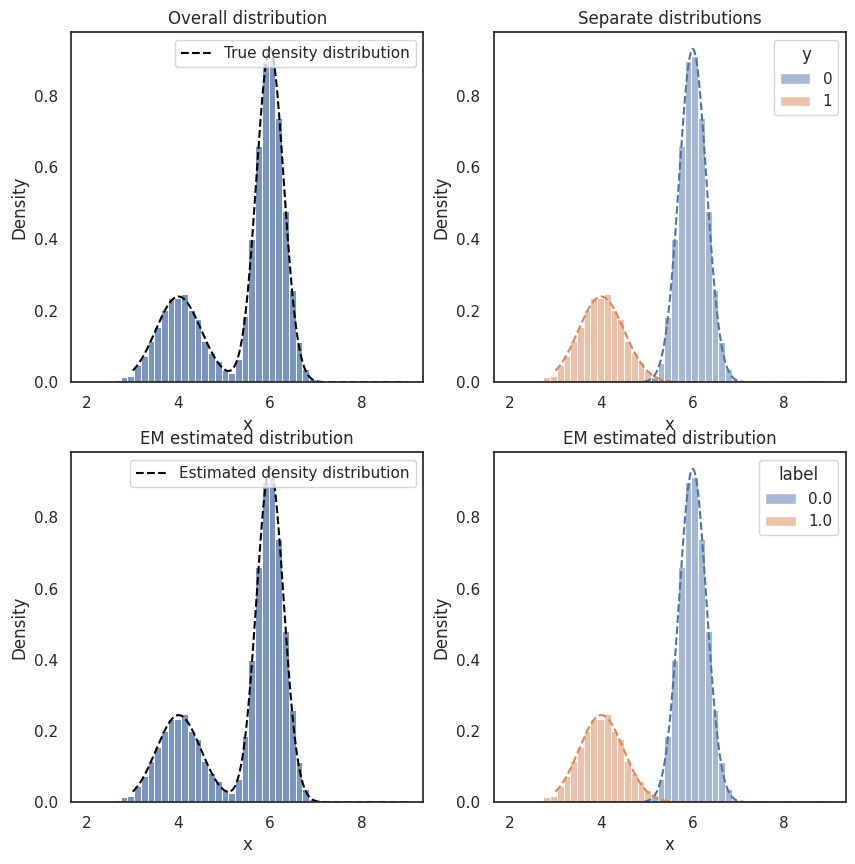

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
t = np.linspace(3, 9, 1000)

sns.histplot(data, x='x', stat='density', ax=ax1, binrange=[2, 7])
ax1.plot(t, mixture_density_2(t, p, mu1, mu2, std1 ** 2, std2 ** 2), linestyle='--', color='black', label="True density distribution")
ax1.set_title('Overall distribution')
ax1.legend()
sns.move_legend(ax1, "upper right")

sns.histplot(data, x='x', hue='y', multiple='layer', stat='density', ax=ax2, binrange=[2, 7])
ax2.set_title('Separate distributions')
ax2.plot(t, normal_density(t, mu2, std2 ** 2) * (1 - p), linestyle='--')
ax2.plot(t, normal_density(t, mu1, std1 ** 2) * p, linestyle='--')


sns.histplot(data, x='x', stat='density', ax=ax3, binrange=[2, 7])
ax3.plot(t, mixture_density_2(t, p_i, mu1_i, mu2_i, var1_i, var2_i), linestyle='--', color='black', label="Estimated density distribution")
ax3.set_title('EM estimated distribution')
ax3.legend()
sns.move_legend(ax3, "upper right")

sns.histplot(data, x='x', hue='label', multiple='layer', stat='density', ax=ax4, binrange=[2, 7])
ax4.set_title('EM estimated distribution')
ax4.plot(t, normal_density(t, mu2_i, var2_i) * (1 - p_i), linestyle='--')
ax4.plot(t, normal_density(t, mu1_i, var1_i) * p_i, linestyle='--')